# Data analysis on thermal phase 2+1D CDT

Author: Seda den Boer

Date: 04/04/2024

In [154]:
# Load packages
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## Experiment parameters

In [478]:
chains = 16
k0_values = np.arange(0.0, 8.0, 1.0)
T = 3
thermal_sweeps = 1000
sweeps = 0
target_volume = 9000
ksteps = target_volume * 100

# k0 to make plots for
k0 = 7.0

## $k_3$

### Critical $k_3$

In [479]:
last_k3 = {k: [] for k in k0_values}

for k in k0_values:
    path = f'thermal_{target_volume}/T{T}/measurements/k0={k}'
    filepaths = glob.glob(f'{path}/*k3_values.npy')
    for file in filepaths:
        
        # print(file)
        k3_values = np.load(file)

        # Get final value in the dataset
        last_k3[k].append(k3_values[-1])


# Make it a df 
df_critical_k3 = pd.DataFrame(last_k3).T
df_critical_k3.index.name = 'k0'
df_critical_k3.columns.name = 'chain'
df_critical_k3['mean'] = df_critical_k3.mean(axis=1)
df_critical_k3['std'] = df_critical_k3.std(axis=1)
df_critical_k3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,0.95458,0.95162,0.95736,0.95464,0.95502,0.95368,0.95350,0.95308,0.95318,0.95550,0.95796,0.95272,0.95516,0.95450,0.95642,0.95110,0.954376,0.001833
1.0,1.08328,1.08342,1.08146,1.08490,1.08208,1.08482,1.08226,1.08154,1.08612,1.08668,1.08508,1.08292,1.08206,1.08540,1.08354,1.08232,1.083617,0.001620
2.0,1.22496,1.22368,1.22216,1.22238,1.22178,1.22132,1.22276,1.22310,1.22316,1.22332,1.22430,1.22246,1.22498,1.22510,1.22300,1.22274,1.223200,0.001108
3.0,1.37018,1.37028,1.36886,1.36978,1.37168,1.37204,1.37052,1.37132,1.37038,1.36974,1.36960,1.36878,1.36912,1.36980,1.36948,1.37216,1.370232,0.001037
4.0,1.52998,1.52948,1.53018,1.52984,1.53090,1.52912,1.53230,1.52960,1.52922,1.53024,1.52916,1.52778,1.52984,1.52912,1.52878,1.53178,1.529833,0.001080
5.0,1.70158,1.70314,1.70270,1.70358,1.70290,1.70220,1.70398,1.70388,1.70316,1.70422,1.70428,1.70490,1.70306,1.70564,1.70348,1.70250,1.703450,0.000994
6.0,1.89202,1.89798,1.88902,1.89132,1.89842,1.89628,1.89702,1.88962,1.89016,1.89758,1.89064,1.89328,1.89344,1.89724,1.88894,1.89516,1.893633,0.003352
7.0,2.13846,2.14004,2.13928,2.13992,2.13890,2.13992,2.13846,2.13924,2.13960,2.13892,2.13860,2.13884,2.13926,2.13974,2.13954,2.13972,2.139277,0.000515


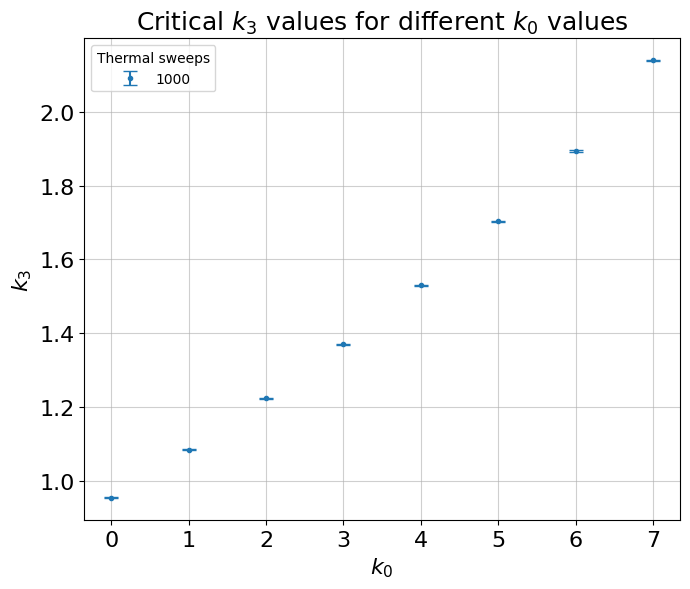

In [480]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.errorbar(df_critical_k3.index, df_critical_k3['mean'], yerr=df_critical_k3['std'], fmt='.', capsize=5, xerr=None, label=1000)
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}/N{target_volume}/T{T}_critical_k3_values_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning/T{T}/N{target_volume}'):
    os.makedirs(f'plots/k3_tuning/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### $k_3$ over time

In [481]:
path = f'thermal_{target_volume}/T{T}/N{target_volume}/N{target_volume}/measurements/k0={k0}'
filepaths_k3 = glob.glob(f'{path}/*k3_values.npy')
k3_values = []
for filepath in filepaths_k3:
    k3_values.append(np.load(filepath))

# Make it a df to plot easily the mean and std
df_k3 = pd.DataFrame(k3_values)
# make a column for chain, sweep and the values k3
df_k3 = df_k3.melt(var_name='sweep', value_name='k3', ignore_index=False).reset_index()
# Increase sweep number by 1
df_k3['sweep'] += 1
df_k3

,index,sweep,k3


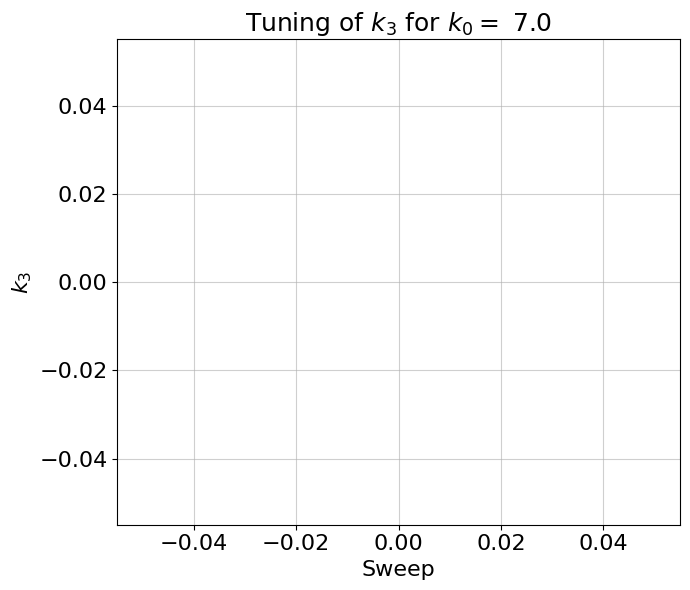

In [482]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_k3, x='sweep', y='k3', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.title(f'Tuning of $k_3$ for $k_0=$ {k0}', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}/N{target_volume}/T{T}_k3_tuning_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning/T{T}/N{target_volume}'):
    os.makedirs(f'plots/k3_tuning/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Acceptance ratios

In [483]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_ar = glob.glob(f'{path}/*acceptance_ratios.npy')
ar_add = []
ar_delete = []
ar_flip = []
ar_shift = []
ar_ishift = []

for filepath in filepaths_ar:
    ar = np.load(filepath)
    ar_add.append(ar[:, 0])
    ar_delete.append(ar[:, 1])
    ar_flip.append(ar[:, 2])
    ar_shift.append(ar[:, 3])
    ar_ishift.append(ar[:, 4])

# Make it a df to plot easily the mean and std
df_ar_add = pd.DataFrame(ar_add)
df_ar_delete = pd.DataFrame(ar_delete)
df_ar_flip = pd.DataFrame(ar_flip)
df_ar_shift = pd.DataFrame(ar_shift)
df_ar_ishift = pd.DataFrame(ar_ishift)

# Make a column for chain, sweep and the values ar
df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

# Increase sweep number by 1
df_ar_add['sweep'] += 1
df_ar_delete['sweep'] += 1
df_ar_flip['sweep'] += 1
df_ar_shift['sweep'] += 1
df_ar_ishift['sweep'] += 1

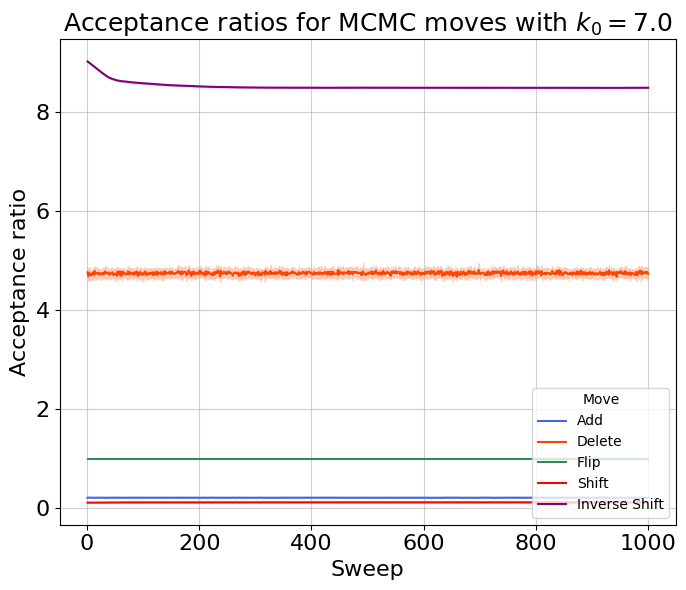

In [484]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='lower right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}/N{target_volume}/T{T}_acceptance_ratios_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/acceptance_ratios/T{T}/N{target_volume}'):
    os.makedirs(f'plots/acceptance_ratios/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

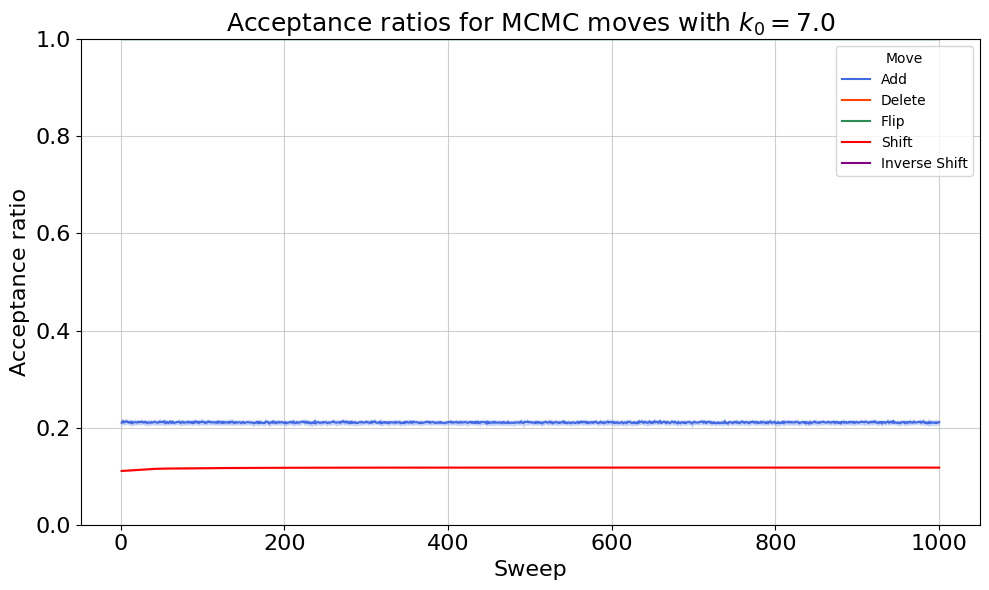

In [485]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.ylim(0, 1)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}/N{target_volume}/zoomin_T{T}_acceptance_ratios_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/acceptance_ratios/T{T}/N{target_volume}'):
    os.makedirs(f'plots/acceptance_ratios/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## Succes rates

In [486]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_successes = glob.glob(f'{path}/*successes.npy')
filepath_fails = glob.glob(f'{path}/*fails.npy')

sr_add = []
sr_delete = []
sr_flip = []
sr_shift = []
sr_ishift = []

for i in range(chains):
    successes = np.load(filepaths_successes[i])
    fails = np.load(filepath_fails[i])
    sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
    sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
    sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
    sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
    sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

# Make it a df to plot easily the mean and std
df_sr_add = pd.DataFrame(sr_add)
df_sr_delete = pd.DataFrame(sr_delete)
df_sr_flip = pd.DataFrame(sr_flip)
df_sr_shift = pd.DataFrame(sr_shift)
df_sr_ishift = pd.DataFrame(sr_ishift)

# Make a column for chain, sweep and the values sr
df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

# Increase sweep number by 1
df_sr_add['sweep'] += 1
df_sr_delete['sweep'] += 1
df_sr_flip['sweep'] += 1
df_sr_shift['sweep'] += 1
df_sr_ishift['sweep'] += 1

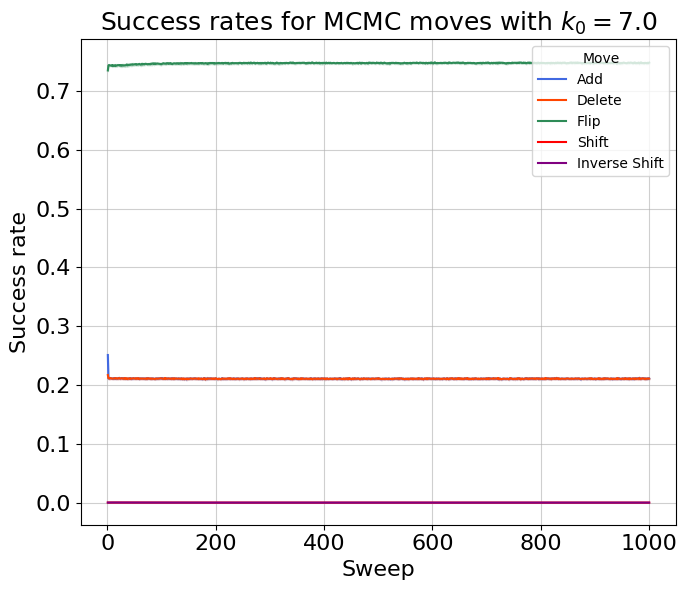

In [487]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

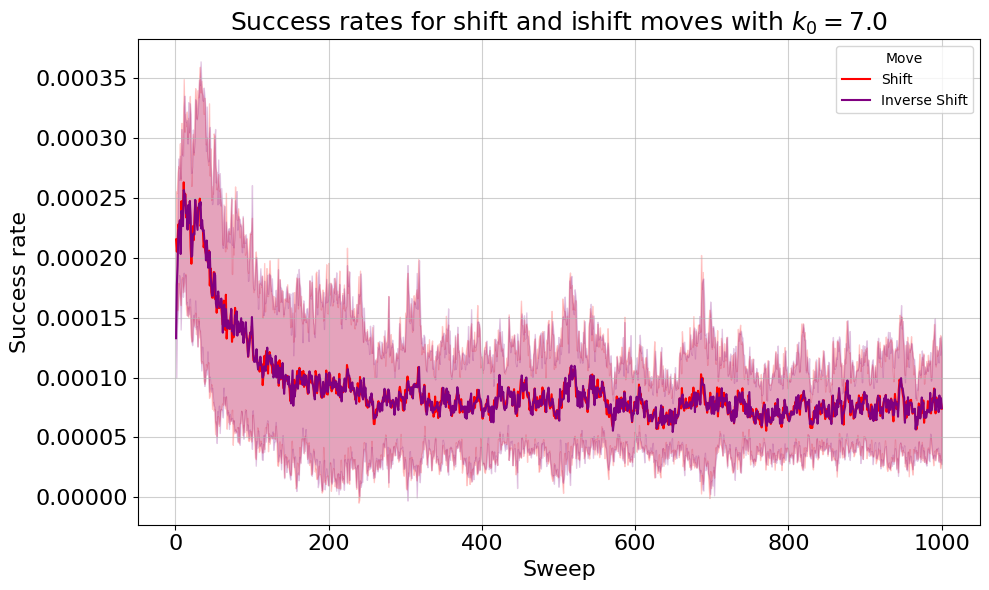

In [488]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for shift and ishift moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_shift_ishift_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


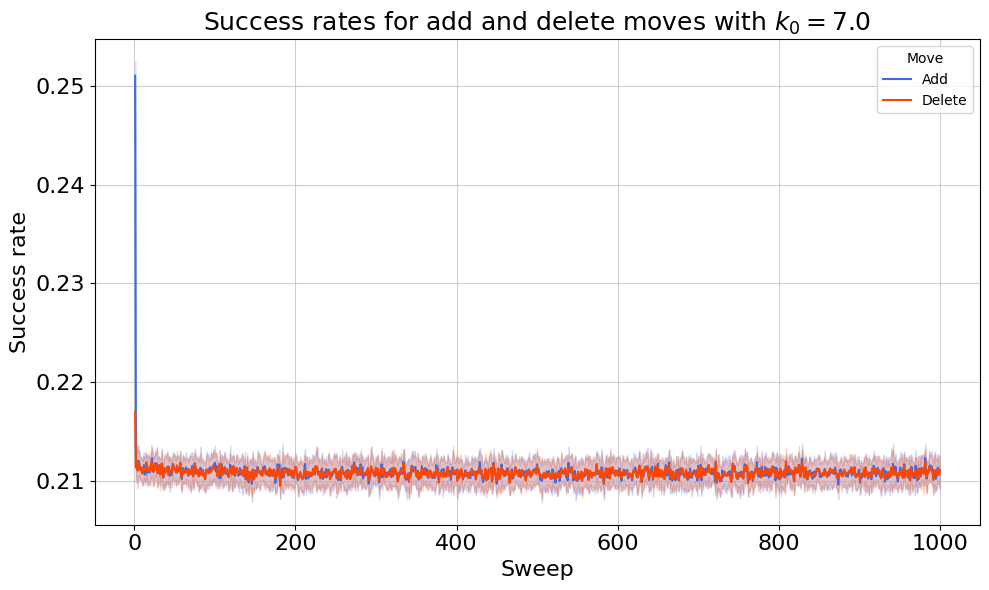

In [489]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for add and delete moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_add_delete_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## $<N_{22}/N_{31}>$

### Over time

In [490]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_n22 = glob.glob(f'{path}/*n_tetras_22.npy')
filepaths_n31 = glob.glob(f'{path}/*n_tetras_31.npy')

n22_n31 = []

for i in range(chains):
    n22 = np.load(filepaths_n22[i])
    n31 = np.load(filepaths_n31[i])
    n22_n31.append(n22 / n31)

# Make it a df to plot easily the mean and std
df_n22_n31 = pd.DataFrame(n22_n31)
df_n22_n31 = df_n22_n31.melt(var_name='sweep', value_name='n22/n31', ignore_index=False).reset_index()
df_n22_n31['sweep'] += 1
df_n22_n31

,index,sweep,n22/n31
0,0,1,1.000000
1,1,1,1.000000
2,2,1,1.000000
3,3,1,1.000000
4,4,1,1.000000
...,...,...,...
16011,11,1001,0.001349
16012,12,1001,0.001911
16013,13,1001,0.003370
16014,14,1001,0.001876


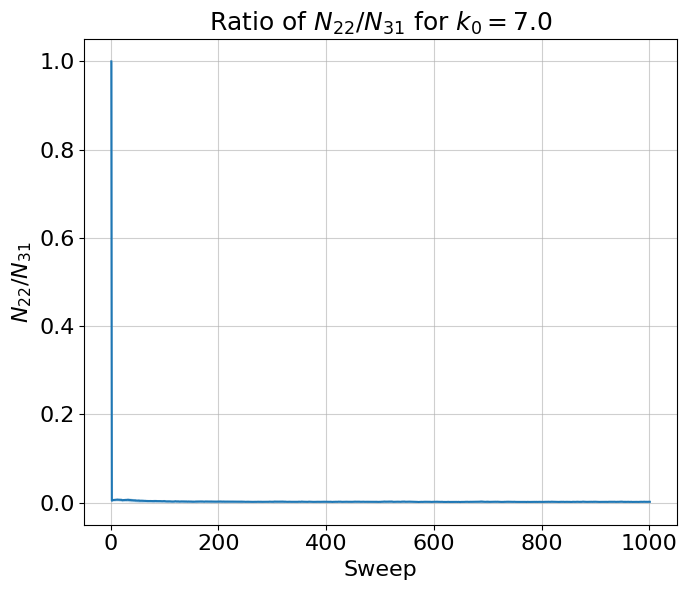

In [491]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_n22_n31, x='sweep', y='n22/n31', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22}/N_{31}$', fontsize=16)
plt.title(f'Ratio of $N_{{22}}/N_{{31}}$ for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/n22_n31/T{T}/N{target_volume}/T{T}_n22_n31_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/n22_n31/T{T}/N{target_volume}'):
    os.makedirs(f'plots/n22_n31/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Curvature

In [492]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_curvature = glob.glob(f'{path}/*curvature.npy')

avg_curvature = {chain: [] for chain in range(chains)}
std_curvature = {chain: [] for chain in range(chains)}
curvature = {}

for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    final_added_values = []
    for data in curvature_data:
        added_values = []
        for key, value in data.items():
            # Add the values together in 1 list
            added_values += value

        # Calculate the average and std of the curvature
        avg_curvature[i].append(np.mean(added_values))
        std_curvature[i].append(np.std(added_values))
        

# Make it a df to plot easily the mean and std
df_avg_curvature = pd.DataFrame(avg_curvature).T
df_avg_curvature.index.name = 'chain'
df_avg_curvature.columns.name = 'sweep'
df_avg_curvature = df_avg_curvature.melt(var_name='sweep', value_name='avg_curvature', ignore_index=False).reset_index()
df_avg_curvature



,chain,sweep,avg_curvature
0,0,0,3.600000
1,1,0,3.600000
2,2,0,3.600000
3,3,0,3.600000
4,4,0,3.600000
...,...,...,...
16011,11,1000,5.992065
16012,12,1000,5.992051
16013,13,1000,5.992147
16014,14,1000,5.991919


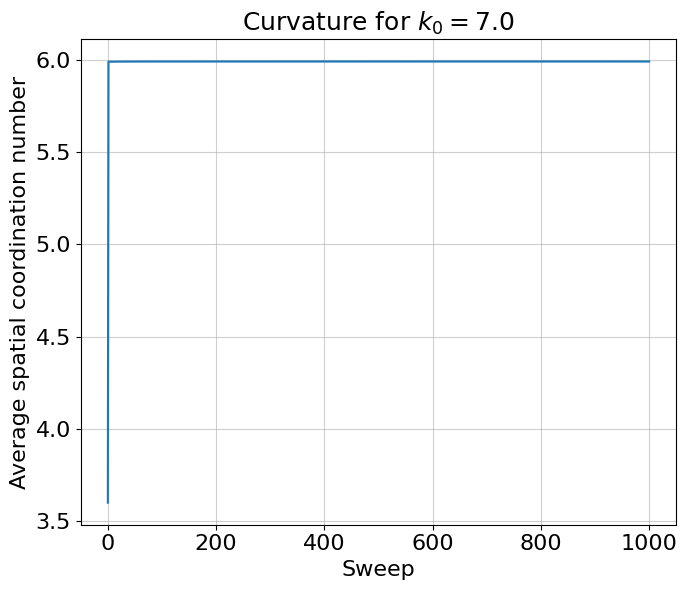

In [493]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_avg_curvature, x='sweep', y='avg_curvature', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Average spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/T{T}_curvature_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

In [494]:
# Add all data for at each sweep together from each chain
tmp1 = []
for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    added = []
    # print(curvature_data)

    for d in curvature_data:
        tmp2 = []
        for value in d.values():
            tmp2 += value
        added.append(tmp2)
    tmp1.append(added)

curvature = [list(sum(zip(*sublists), ())) for sublists in zip(*tmp1)]

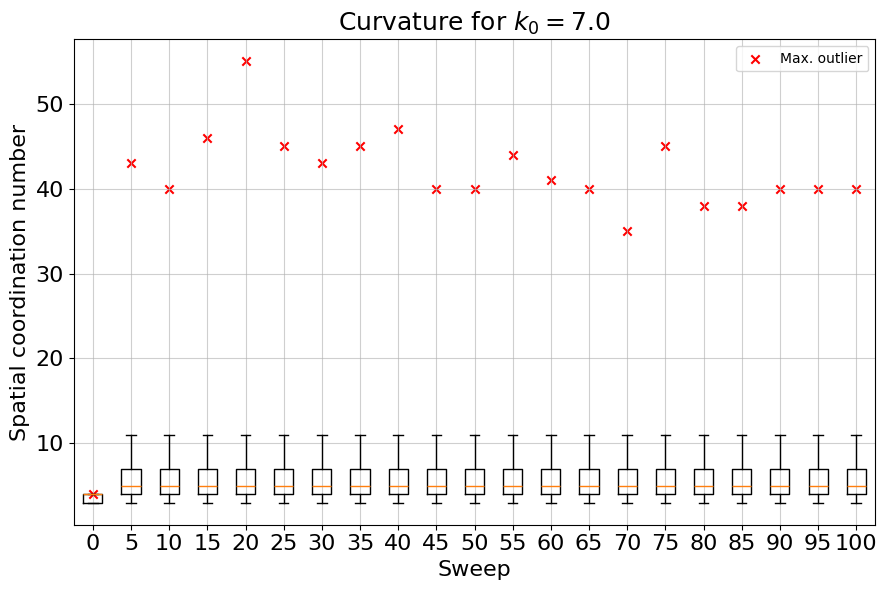

In [495]:
# Plot boxplots of the curvature for every 5 sweeps
sweeps_display = np.arange(0, 101, 5)
boxplot_data = [curvature[i] for i in sweeps_display]
plt.figure(figsize=(9, 6))
plt.boxplot(boxplot_data, showfliers=False)
# Manual plotting of maximum outliers
max_outliers = [np.max(data) for data in boxplot_data]
plt.scatter(np.arange(1, len(sweeps_display) + 1), max_outliers, marker='x', color='red', label='Max. outlier')
plt.xticks(range(1, len(sweeps_display) + 1), sweeps_display)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend()
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/T{T}_curvature_boxplot_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Spectral dimension

In [496]:
# target_volume = 3000
# k0 = 1.0
# sigma = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# # Load files single timeslice
# paths_T3 = [f'thermal_{target_volume}/spectral_dimension/spectral_dimensions_single_timeslice_T=3_k0={k0}_chain={int(k0)}_run={run}.npy' for run in range(10)]
# paths_T5 = [f'thermal_{target_volume}/spectral_dimension/spectral_dimensions_single_timeslice_T=5_k0={k0}_chain={int(k0)}_run={run}.npy' for run in range(10)]
# paths_T10 = [f'thermal_{target_volume}/spectral_dimension/spectral_dimensions_single_timeslice_T=10_k0={k0}_chain={int(k0)}_run={run}.npy' for run in range(10)]

# for path in paths_T3:
#     print(path)
#     data_T3 = np.load(path, allow_pickle=True)
#     print(data_T3)


# # Plot the average and std of the spectral dimension all in one plot
# plt.figure(figsize=(7, 6))
# plt.xlabel('$\sigma$', fontsize=16)
# plt.ylabel('Spectral dimension', fontsize=16)
# plt.title(f'Spectral dimension for $k_0={k0}$', fontsize=18)
# plt.yticks(fontsize=16)
# plt.xticks(fontsize=16)
# plt.grid(True, which="both", ls="-", alpha=0.6)
# plt.legend(title='Timeslices', fancybox=True)
# plt.tight_layout()
# savepath = f'plots/spectral_dimension/T{T}/N{target_volume}/spectral_dimension_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
# if not os.path.exists(f'plots/spectral_dimension/T{T}/N{target_volume}'):
#     os.makedirs(f'plots/spectral_dimension/T{T}/N{target_volume}')
# plt.savefig(savepath, dpi=400, bbox_inches='tight')
